# Abrac-adabra group
## P3 results
### ADA course
### 20 december 2024

## 0) Imports

In [1]:
import pandas as pd
import ast

from src.scripts.mutants_analysis import compute_variation_ic50, plot_ic50_graph, compute_multiple_alignment, plot_ic50_graph_with_probabilities

2024-12-15 18:25:17.951215: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 1) Impact of Mutations in Reference-Mutant Protein Groups on Ligand Binding Affinities

To illustrate the analyses performed to answer this research question, we focus on a single reference-mutant group that includes all types of mutations: insertions, deletions, and substitutions.
The reference chosen is Epidermal growth factor receptor in humans.

**Note: The processing of the binding DB dataset is detailed in the P2 results and is not included here to maintain the notebook's focus and conciseness.**

In [2]:
# Read mutants.csv containing the reference-mutant protein groups
mutants_df = pd.read_csv('data/mutants.csv')
# Modify the columns for how they are formatted after to_csv function
mutants_df['Target Names'] = mutants_df['Target Names'].apply(lambda x: ast.literal_eval(x))
mutants_df['BindingDB Target Chain Sequence'] = mutants_df['BindingDB Target Chain Sequence'].apply(lambda x: ast.literal_eval(x))

# Read merged_df.csv containing the IC50 values for each interaction
merged_df = pd.read_csv('data/merged_df.csv')

# Indentify the reference-mutant protein group we are interested in showing
row = mutants_df.iloc[3975]

# Compute variations in IC50
differences_explode, grouped_df, differences = compute_variation_ic50(row, merged_df)

The first step in our analysis involved extracting information about the differences between each mutant sequence and the reference sequence. This was achieved through pairwise alignment of the reference proteins with their corresponding mutants. While some of this information is encoded in the mutant names, their unformatted notation and occasional errors (e.g., incorrect numbering like 7350 instead of 735) made direct use impractical and time-consuming.

In this section, we provide an example of the differences identified between the reference protein and its mutants. For instance, the mutant name EGFR [1-18,20-1210,C797S] indicates a deletion at position 19 and a mutation at position 797. By aligning sequences, we observe a deletion at position 18 (calculated as 19 - 1, assuming zero-based indexing) and a substitution at position 796.

In [3]:
# Show differences between reference and mutant in one reference-mutant protein group
differences[['Mutant Name', 'Insertion Positions', 'Deletion Positions', 'Substitution Positions']]

,Mutant Name,Insertion Positions,Deletion Positions,Substitution Positions
0,"Epidermal growth factor receptor [1-18,20-1210...",[],[18],[796]
1,"Epidermal growth factor receptor [1-18,20-1210...",[],[18],"[789, 796]"
2,"Epidermal growth factor receptor [1-18,20-1210...",[],[18],[789]
3,"Epidermal growth factor receptor [1-18,20-1210]",[],[18],[]
4,"Epidermal growth factor receptor [1-769,'ASV',...","[769, 770, 771]",[],[]
5,"Epidermal growth factor receptor [1-773,'NPH',...","[773, 774, 775]",[],[]
6,"Epidermal growth factor receptor [668-1210,T79...",[],"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[789, 857]"
7,"Epidermal growth factor receptor [L858R,C797S]",[],[],"[796, 857]"
8,"Epidermal growth factor receptor [L858R,T790M,...",[],[],"[789, 796, 857]"
9,Epidermal growth factor receptor [L858R],[],[],[857]


The same information can be presented in different formats, depending on how we choose to display it. For instance, here we organize the data by mutation type. The first line from the previous dataframe is now split into two separate lines, both sharing the same Mutant Name. The first line specifies the substitution, detailing the exact change from one amino acid to another, while the second line represents a gap.

In [4]:
grouped_df[['Mutant Name', 'Type', 'Mutation', 'Positions']]

,Mutant Name,Type,Mutation,Positions
0,"Epidermal growth factor receptor [1-18,20-1210...",substitution,Cysteine -> Serine,[796]
1,"Epidermal growth factor receptor [1-18,20-1210...",gap,Deletion,[18]
2,"Epidermal growth factor receptor [1-18,20-1210...",substitution,Threonine -> Methionine,[789]
3,"Epidermal growth factor receptor [1-18,20-1210...",substitution,Cysteine -> Serine,[796]
4,"Epidermal growth factor receptor [1-18,20-1210...",gap,Deletion,[18]
5,"Epidermal growth factor receptor [1-18,20-1210...",substitution,Threonine -> Methionine,[789]
6,"Epidermal growth factor receptor [1-18,20-1210...",gap,Deletion,[18]
7,"Epidermal growth factor receptor [1-18,20-1210]",gap,Deletion,[18]
8,"Epidermal growth factor receptor [1-769,'ASV',...",insertion,"[Alanine, Serine, Valine]","[769, 770, 771]"
9,"Epidermal growth factor receptor [1-773,'NPH',...",insertion,"[Asparagine, Proline, Histidine]","[773, 774, 775]"


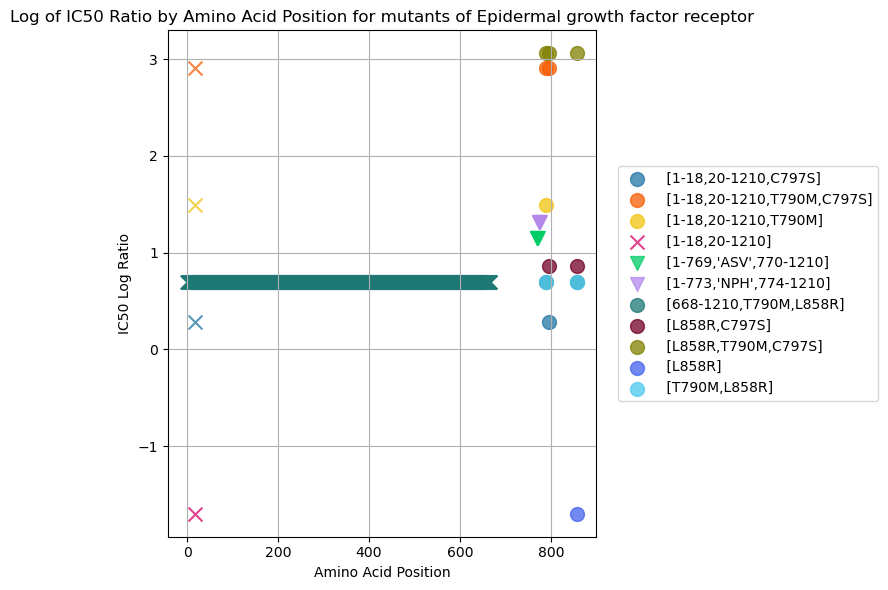

In [5]:
# Plot IC50 ratio
plot_ic50_graph(row, merged_df, 'IC50 Log Ratio', title='Log of IC50 Ratio')

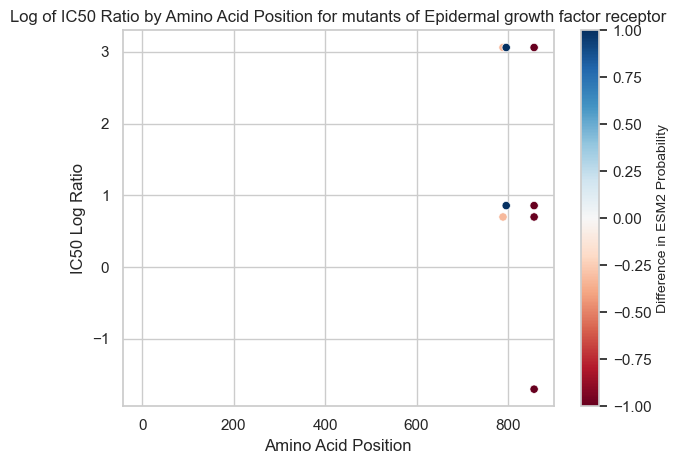

In [6]:
plot_ic50_graph_with_probabilities(row, merged_df, 'IC50 Log Ratio', title='Log of IC50 Ratio')

This is the Multiple Sequence Alignment (MSA). The reference sequence served as the template, and the alignments of the other mutants were adjusted only at the positions corresponding to the insertions.

In [7]:
# Compute alignment
align = compute_multiple_alignment(row['WT Target Name'], row['Target Names'],                                row['BindingDB Target Chain Sequence'])
align

,Protein Name,Alignment
0,Epidermal growth factor receptor,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...
1,"Epidermal growth factor receptor [1-18,20-1210...",MRPSGTAGAALLALLAAL-PASRALEEKKVCQGTSNKLTQLGTFED...
2,"Epidermal growth factor receptor [1-18,20-1210...",MRPSGTAGAALLALLAAL-PASRALEEKKVCQGTSNKLTQLGTFED...
3,"Epidermal growth factor receptor [1-18,20-1210...",MRPSGTAGAALLALLAAL-PASRALEEKKVCQGTSNKLTQLGTFED...
4,"Epidermal growth factor receptor [1-18,20-1210]",MRPSGTAGAALLALLAAL-PASRALEEKKVCQGTSNKLTQLGTFED...
5,"Epidermal growth factor receptor [1-769,'ASV',...",MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...
6,"Epidermal growth factor receptor [1-773,'NPH',...",MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...
7,"Epidermal growth factor receptor [668-1210,T79...",----------------------------------------------...
8,"Epidermal growth factor receptor [L858R,C797S]",MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...
9,"Epidermal growth factor receptor [L858R,T790M,...",MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...
